In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
df = pd.read_csv(r'StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<Axes: xlabel='gender', ylabel='count'>

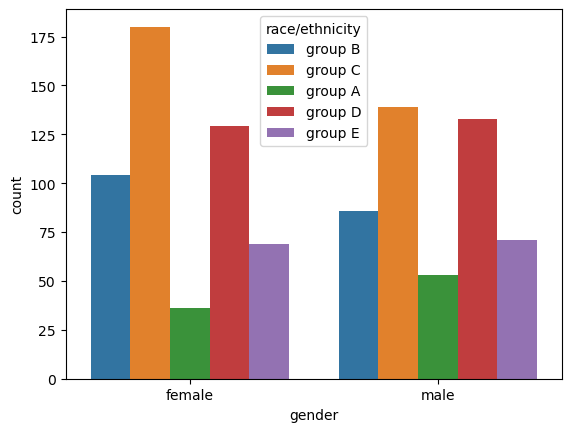

In [26]:
sns.countplot(x='gender',data=df,hue='race/ethnicity')

Encoding the categorical data

Using label encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [39]:
x =  df.drop('math score',axis=1)
x = x.drop('reading score',axis=1)
x =  x.drop('writing score',axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


In [49]:
#assign math score reading score and writing score columns to y
ymath = df['math score']
yreading = df['reading score']
ywriting = df['writing score']

# complete the training part

For math scores

In [63]:
from sklearn.preprocessing import scale
Xs =scale(x)
Ysmath = scale(ymath)
x_train,x_test,ymath_train,ymath_test = train_test_split(Xs,Ysmath,test_size=0.2,random_state=0)

In [64]:
logistic = LogisticRegression()

#do the logistic regression
logistic.fit(x_train,ymath_train)


ValueError: Unknown label type: 'continuous'

Using one hot encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

gend = ohe.fit_transform(df[['gender']]).toarray()

df_1 = pd.DataFrame(gend,columns=ohe.categories_)
df_1.head()

parent = ohe.fit_transform(df[['parental level of education']]).toarray()
df_2 = pd.DataFrame(parent,columns=ohe.categories_)
df_2.head()

lunch = ohe.fit_transform(df[['lunch']]).toarray()
df_3 = pd.DataFrame(lunch,columns=ohe.categories_)
df_3.head()

test = ohe.fit_transform(df[['test preparation course']]).toarray()
df_4 = pd.DataFrame(test,columns=ohe.categories_)
df_4.head()

race = ohe.fit_transform(df[['race/ethnicity']]).toarray()
df_5 = pd.DataFrame(race,columns=ohe.categories_)
df_5.head()

df_final = pd.concat([df,df_1,df_2,df_3,df_4,df_5],axis=1)

In [66]:
df_final.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,"(0,)","(1,)",...,"(5,)","(0,)","(1,)","(0,)","(1,)","(0,)","(1,)","(2,)","(3,)","(4,)"
0,0,1,1,1,1,72,72,74,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0,2,4,1,0,69,90,88,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,3,1,1,90,95,93,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,0,1,47,57,44,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,2,4,1,1,76,78,75,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
